In [9]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# Question 1

 A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.
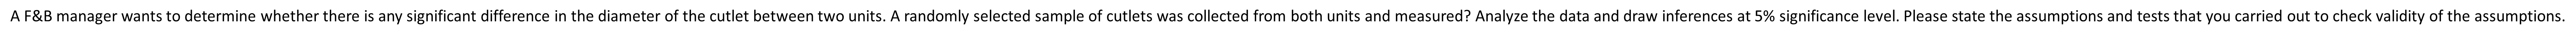

# step 1
Assuming Null hypothesis and alternate hypothesis
Null hypothesis :µ_1=µ_2(There is no difference between two sample)
Alternate hypothesis :µ_1≠µ_2( There is difference between two sample)

# Step 2
We will use Two-tail, t-Test 

# Step 3
Given significance leve (α) = 5% = 0.05
As it is twwo tail test : 0.05/2 = 0.025

In [3]:
# load data
data1 = pd.read_csv('Cutlets.csv')
data1.head(10)

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [6]:
# Descriptive Statistics 
data1.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [4]:
#null value
data1.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

# Step 4


In [7]:
# usnig Two tail t-test
stats1, pval1 = stats.ttest_ind(data1['Unit A'].to_numpy(),data1['Unit B'].to_numpy())
pval1

0.4722394724599501

In [9]:
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, pval1))
if pval1 <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject Null hypothesis, there is no significant difference')

Significnace=0.025, p=0.472
We fail to reject Null hypothesis, there is no significant difference


# Question 2
A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.

Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

# Step 1
let null hypothesis: µ1= µ2= µ3= µ4 (i.e. all 4 recordsd are equal)


Alternate hypothesis: Atleast One of them is different

# Step 2
We will use Annova test in this case 

# Step 3
Given significance leve (α) = 5% = 0.05 

In [14]:
#load data 
data2 = pd.read_csv('LabTAT.csv')
data2

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [15]:
data2.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [16]:
# checking null values
data2.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [17]:
alpha2 = 0.05

# Step 4

In [19]:
# using anova test
stats2, pval2 = stats.f_oneway(data2['Laboratory 1'],data2['Laboratory 2'],data2['Laboratory 3'],data2['Laboratory 4'])
pval2

2.1156708949992414e-57

In [21]:
print('Significnace=%.3f, p=%.3f' % (alpha2, pval2))
if  pval2 <= alpha2:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis, there is no difference')


Significnace=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


# Question 3


# Step 1
Null Hypothesis: There is no association or dependency between the gender based buyer rations across regions


Alternative Hypthosis: There is a significant association or dependency between the gender based buyer rations across regions


# Step 2
Significance 5%


We will use one-tailed test

alpha3 = 1-0.95 = 0.05

In [27]:
alpha3 = 0.05

# Step 3

In [22]:
# load data
data3 = pd.read_csv('BuyerRatio.csv')
data3

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [23]:
data3_table = [[50,142,131,70],
             [435,1523,1356,750]]

In [26]:
## Applying Chi-Square
stats3, pval3, dof, exp = stats.chi2_contingency(data3_table )
print(stats3,"\n", pval3,"\n", dof,"\n", exp)

1.595945538661058 
 0.6603094907091882 
 3 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [28]:
if  pval3 <= alpha3:
    print('We reject null hypothesis , proportions are not equal')
else:
    print('We failed to reject null hypothesis , all proportions are equal')

We failed to reject null hypothesis , all proportions are equal


# Question 4
TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


# Step 1
Let null hypothesis be Ho: p1 = p2 (i.e defective % does not varies by centre )

and Alternative hypothesis Ha: p1 ≠ p2(i.e defective % varies by centre)

# Step 2
Significance level 5%

alpha4 = 0.05

In [2]:
# load data
data4 = pd.read_csv('Costomer+OrderForm.csv')
data4

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [3]:
# descriptive stats
data4.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [4]:
# null values
data4.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

# Step 4
values count 

In [6]:
print(data4['Phillippines'].value_counts(),'\n',data4['Indonesia'].value_counts(),'\n',data4['Malta'].value_counts(),'\n',data4['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


#  Step 5
Contingency table

In [7]:
contingency_table = [[271,267,269,280],
                    [29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


# step 6
calculating expected value for observed value 

In [11]:
stats4, pval4, dof, exp  = stats.chi2_contingency(contingency_table)
print("Statistics = ",stats4,"\n",'P_Value = ', pval4,'\n', 'degree of freedom =', dof,'\n', 'Expected Values = ', exp)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [13]:
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

# Step 7
hypothesis using t-statistics

In [15]:
test_statistic , p_value = stats.chisquare(observed, expected, ddof = dof)
print("Test Statistic = ",test_statistic,'\n', 'p_value =',p_value)

Test Statistic =  3.858960685820355 
 p_value = 0.4254298144535761


In [17]:
alpha4 = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha4, p_value))
if p_value <= alpha4:
    print('We reject Null Hypothesis varies by centre')
else:
    print('We fail to reject Null hypothesis, defective % does not varies by centre')

Significnace=0.050, p=0.425
We fail to reject Null hypothesis, defective % does not varies by centre
